### Fisher Discriminant Analysis

Hanyang U. 2023

Dates: 2023-3-30

Author: Yung-Kyun Noh

Department of Computer Science, Hanyang University / School of Computational Sciences, KIAS


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def draw_state(wval, bval, title_str='Data'):
    # function for scattering data and drawing classification boundary
    # wx - b > 0 or  wx - b < 0
    
    # create a figure and axis
    fig, ax = plt.subplots()

    # Scatter data points in 2-dimensional space
    ax.scatter(data1[:,0], data1[:,1], label='class 1', c='red', alpha=.3)
    ax.scatter(data2[:,0], data2[:,1], label='class 2', marker='^', c='blue', alpha=.3)
    # set a title and labels
    ax.set_title(title_str)
    ax.legend()
    
    [x1min,x1max,x2min,x2max] = ax.axis()
    x1vals = np.arange(x1min,x1max,0.1)
    ax.plot(x1vals, (-wval[0]*x1vals + bval)/wval[1], 'k')
    ax.axis([x1min,x1max,x2min,x2max])
    ax.grid()


### Data generation

In [3]:
# generate two Gaussians (class 1 & class 2)
dim = 2
datanum1 = 50
datanum2 = 50
mean1 = np.array([0, 0])
mean2 = np.array([1, -.5])
# mean2 = np.array([2, 2])
cov1 = np.array([[.1,.02],[.02,.1]])
cov2 = np.array([[.1,.02],[.02,.1]])
data1 = np.random.multivariate_normal(mean1, cov1, datanum1)
data2 = np.random.multivariate_normal(mean2, cov2, datanum2)
tstdatanum1 = 100
tstdatanum2 = 100
tstdata1 = np.random.multivariate_normal(mean1, cov1, tstdatanum1)
tstdata2 = np.random.multivariate_normal(mean2, cov2, tstdatanum2)

### Optimal Bayes classifier

[-11.45833333   7.29166667] -7.552083333333334


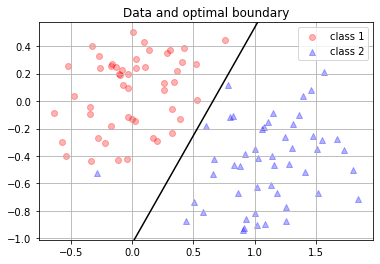

In [4]:
optw = np.matmul(mean1 - mean2, np.linalg.inv(cov1))
optb = np.matmul(optw, (mean1 + mean2)/2)
print(optw, optb)

draw_state(optw, optb, 'Data and optimal boundary')

### Learning

In [5]:
estMean1 = np.mean(data1, axis=0)
estMean2 = np.mean(data2, axis=0)
estCov1 = np.cov(data1.T, bias=True)
estCov2 = np.cov(data2.T, bias=True)
estS_W = datanum1/(datanum1 + datanum2)*estCov1 + datanum2/(datanum1 + datanum2)*estCov2  # Within-class covariance
est_totCov = np.cov(np.concatenate((data1,data2),axis=0).T, bias=True)

For training, we obtain $\mathbf{w}$ maximizing the following objective function with $\mathcal{D} = \{\mathbf{x}_i, y_i\}_{i = 1}^N$, $\mathbf{x}_i\in\mathbb{R}^D$, $y\in\{1,2\}$:
\begin{eqnarray}
L(\mathbf{w}) = \frac{\mathbf{w}^\top\widehat{\Sigma}\mathbf{w}}{\mathbf{w}^\top \widehat{S}_W\mathbf{w}},
\end{eqnarray}
where $\Sigma$ is the total covariance matrix for all data, 
\begin{eqnarray}
\widehat{\Sigma} = \sum_{i = 1}^N (\mathbf{x}_i - \widehat{\mu})(\mathbf{x}_i - \widehat{\mu})^\top, \quad \widehat{\mu} = \sum_{i = 1}^N \mathbf{x}_i,
\end{eqnarray}
and $S_W$ is the within covariance matrix,
\begin{eqnarray}
\widehat{S}_W &=& \frac{N_1}{N_1 + N_2}\widehat{\Sigma}_1 + \frac{N_2}{N_1 + N_2}\widehat{\Sigma}_2, \\
\widehat{\Sigma}_c &=& \sum_{i;y_i = c} (\mathbf{x}_i - \widehat{\mu}_c)(\mathbf{x}_i - \widehat{\mu}_c)^\top, \quad \widehat{\mu}_c = \sum_{i;y_i = c} \mathbf{x}_i, \quad c\in\{1,2\}
\end{eqnarray}


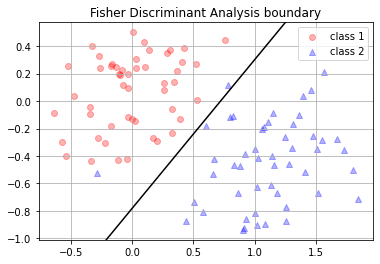

In [6]:
w_vec = np.matmul(np.linalg.inv(estS_W), estMean1 - estMean2)
b_val = np.matmul(w_vec, (estMean1 + estMean2)/2)

draw_state(w_vec, b_val, 'Fisher Discriminant Analysis boundary')

### Evaluation

In [7]:
labels = np.concatenate((np.ones(tstdatanum1), 2*np.ones(tstdatanum2)))
gs = np.matmul(np.concatenate((tstdata1,tstdata2),axis=0), w_vec.T) - b_val  # discriminating function

err_rate = (np.sum(labels[gs > 0] != 1) + np.sum(labels[gs < 0] != 2))/(tstdatanum1 + tstdatanum2)
print(err_rate)

0.025
